# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the variables needed for multiple openweathermap api calls
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
count = 1
# Initialize lists for the columns of the dataframe
citiesWithData = []
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

for city in cities:
    city = city.replace(" ", "+")  #replace space with + for url
    # Request and get json from api
    query_url = f"{base_url}&appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    print(f"Processing city {count} of {len(cities)} | {city} cod:{response['cod']}")
    
    # Verify the response has all needed data
    if response['cod'] == 200:
        citiesWithData.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    count += 1

Processing city 1 of 625 | albany cod:200
Processing city 2 of 625 | revda cod:200
Processing city 3 of 625 | cidreira cod:200
Processing city 4 of 625 | punta+arenas cod:200
Processing city 5 of 625 | ostersund cod:200
Processing city 6 of 625 | vaini cod:200
Processing city 7 of 625 | port+hardy cod:200
Processing city 8 of 625 | busselton cod:200
Processing city 9 of 625 | dikson cod:200
Processing city 10 of 625 | okhotsk cod:200
Processing city 11 of 625 | tabiauea cod:404
Processing city 12 of 625 | ushuaia cod:200
Processing city 13 of 625 | geraldton cod:200
Processing city 14 of 625 | hilo cod:200
Processing city 15 of 625 | hobart cod:200
Processing city 16 of 625 | nsanje cod:200
Processing city 17 of 625 | yellowknife cod:200
Processing city 18 of 625 | usinsk cod:200
Processing city 19 of 625 | barrow cod:200
Processing city 20 of 625 | taolanaro cod:404
Processing city 21 of 625 | castro cod:200
Processing city 22 of 625 | chokurdakh cod:200
Processing city 23 of 625 | sa

Processing city 180 of 625 | inverness cod:200
Processing city 181 of 625 | masindi cod:200
Processing city 182 of 625 | gorontalo cod:200
Processing city 183 of 625 | la+ronge cod:200
Processing city 184 of 625 | mocambique cod:404
Processing city 185 of 625 | bargal cod:404
Processing city 186 of 625 | tidore cod:404
Processing city 187 of 625 | ikovka cod:200
Processing city 188 of 625 | hambantota cod:200
Processing city 189 of 625 | orlik cod:200
Processing city 190 of 625 | guerrero+negro cod:200
Processing city 191 of 625 | storm+lake cod:200
Processing city 192 of 625 | zonguldak cod:200
Processing city 193 of 625 | arraial+do+cabo cod:200
Processing city 194 of 625 | paris cod:200
Processing city 195 of 625 | tiksi cod:200
Processing city 196 of 625 | ardistan cod:404
Processing city 197 of 625 | kiama cod:200
Processing city 198 of 625 | solnechnyy cod:200
Processing city 199 of 625 | the+valley cod:200
Processing city 200 of 625 | kindersley cod:200
Processing city 201 of 62

Processing city 360 of 625 | korem cod:200
Processing city 361 of 625 | jungapeo cod:200
Processing city 362 of 625 | inhambane cod:200
Processing city 363 of 625 | nyagan cod:200
Processing city 364 of 625 | raymondville cod:200
Processing city 365 of 625 | gagesti cod:200
Processing city 366 of 625 | miyako cod:200
Processing city 367 of 625 | havoysund cod:200
Processing city 368 of 625 | mariental cod:200
Processing city 369 of 625 | grindavik cod:200
Processing city 370 of 625 | guano cod:200
Processing city 371 of 625 | raudeberg cod:200
Processing city 372 of 625 | gonaives cod:200
Processing city 373 of 625 | rawah cod:200
Processing city 374 of 625 | aljezur cod:200
Processing city 375 of 625 | portland cod:200
Processing city 376 of 625 | independence cod:200
Processing city 377 of 625 | coruripe cod:200
Processing city 378 of 625 | dakar cod:200
Processing city 379 of 625 | hajdunanas cod:200
Processing city 380 of 625 | dingle cod:200
Processing city 381 of 625 | carutapera

Processing city 538 of 625 | mandalgovi cod:200
Processing city 539 of 625 | lensk cod:200
Processing city 540 of 625 | fort+nelson cod:200
Processing city 541 of 625 | constitucion cod:200
Processing city 542 of 625 | mogadishu cod:200
Processing city 543 of 625 | dano cod:200
Processing city 544 of 625 | tawkar cod:404
Processing city 545 of 625 | san+jeronimo cod:200
Processing city 546 of 625 | maniitsoq cod:200
Processing city 547 of 625 | kalat cod:200
Processing city 548 of 625 | vaitupu cod:404
Processing city 549 of 625 | kuala+terengganu cod:200
Processing city 550 of 625 | mattawa cod:200
Processing city 551 of 625 | envira cod:200
Processing city 552 of 625 | carlos+chagas cod:200
Processing city 553 of 625 | cap+malheureux cod:200
Processing city 554 of 625 | dongzhen cod:200
Processing city 555 of 625 | mendoza cod:200
Processing city 556 of 625 | rudbar cod:200
Processing city 557 of 625 | virginia+beach cod:200
Processing city 558 of 625 | trinidad cod:200
Processing ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create and display the weather data frame
weather_df = pd.DataFrame({"City": citiesWithData,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxTemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed":windSpeed,
                          "Country": country,
                          "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,70.00,18,87,4.00,US,1619290801
1,Revda,56.8010,59.9303,44.60,39,0,8.95,RU,1619290820
2,Cidreira,-30.1811,-50.2056,73.62,72,8,12.46,BR,1619290821
3,Punta Arenas,-53.1500,-70.9167,51.80,71,75,16.11,CL,1619290643
4,Östersund,63.1792,14.6357,33.01,51,61,12.66,SE,1619290821
...,...,...,...,...,...,...,...,...,...
572,Yuxia,34.0615,108.6291,53.60,87,40,8.95,CN,1619290978
573,Eureka,40.8021,-124.1637,53.01,84,100,7.00,US,1619290807
574,North Bend,43.4065,-124.2243,55.99,71,90,6.91,US,1619290842
575,Stabat,3.7610,98.4513,77.00,100,40,2.30,ID,1619290978


In [5]:
# Output all data to csv
weather_df.to_csv("Output/weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check for and remove any rows that have humidity over 100%
if weather_df.describe().loc['max', 'Humidity'] > 100:
    weather_df = weather_df[weather_df.Humidity <= 100]
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,70.00,18,87,4.00,US,1619290801
1,Revda,56.8010,59.9303,44.60,39,0,8.95,RU,1619290820
2,Cidreira,-30.1811,-50.2056,73.62,72,8,12.46,BR,1619290821
3,Punta Arenas,-53.1500,-70.9167,51.80,71,75,16.11,CL,1619290643
4,Östersund,63.1792,14.6357,33.01,51,61,12.66,SE,1619290821
...,...,...,...,...,...,...,...,...,...
572,Yuxia,34.0615,108.6291,53.60,87,40,8.95,CN,1619290978
573,Eureka,40.8021,-124.1637,53.01,84,100,7.00,US,1619290807
574,North Bend,43.4065,-124.2243,55.99,71,90,6.91,US,1619290842
575,Stabat,3.7610,98.4513,77.00,100,40,2.30,ID,1619290978


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

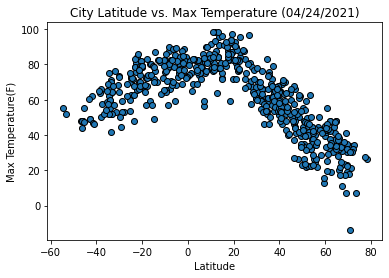

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor='black')
plt.title("City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Figures/LatVSTemp.png")
plt.show()

## Latitude vs. Humidity Plot

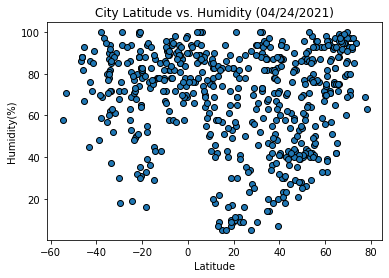

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor='black')
plt.title("City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Figures/LatVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

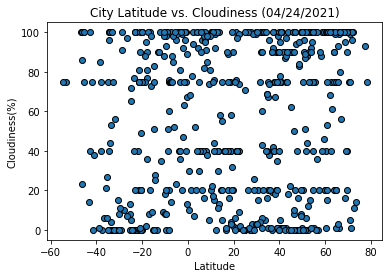

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor='black')
plt.title("City Latitude vs. Cloudiness (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Figures/LatVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

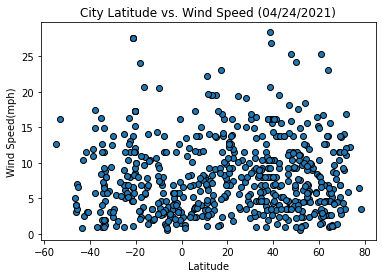

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor='black')
plt.title("City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Figures/LatVSWindSpeed.png")
plt.show()

## Linear Regression

In [11]:
# Seperate the weather data frame into nothern and southern hemispheres
northernHemisphere = weather_df[weather_df.Lat >= 0]
southernHemisphere = weather_df[weather_df.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is -0.8755223425270616


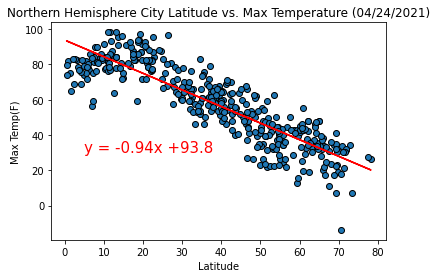

In [12]:
(slp1, int1, rval1, pval1, stderr1) = linregress(northernHemisphere["Lat"], northernHemisphere["Max Temp"])
fit1 = northernHemisphere["Lat"] * slp1 + int1
line_eq1 = "y = " + str(round(slp1,2)) + "x +" + str(round(int1,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Max Temp"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit1,"r-")
plt.annotate(line_eq1,(5,30),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")

print(f"The r-squared value is {rval1}")
plt.savefig("Figures/NorthernHemisphereVSTemp.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.707010314136736


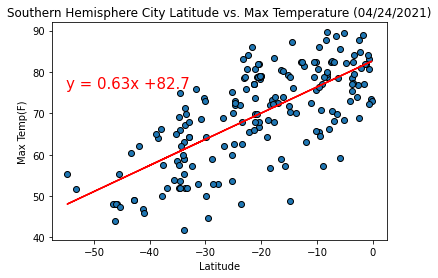

In [13]:
(slp2, int2, rval2, pval2, stderr2) = linregress(southernHemisphere["Lat"], southernHemisphere["Max Temp"])
fit2 = southernHemisphere["Lat"] * slp2 + int2
line_eq2 = "y = " + str(round(slp2,2)) + "x +" + str(round(int2,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Max Temp"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit2,"r-")
plt.annotate(line_eq2,(-55, 76),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")

print(f"The r-squared value is {rval2}")
plt.savefig("Figures/SouthernHemisphereVSTemp.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.14661209607636555


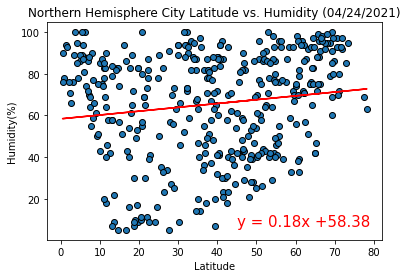

In [29]:
(slp3, int3, rval3, pval3, stderr3) = linregress(northernHemisphere["Lat"], northernHemisphere["Humidity"])
fit3 = northernHemisphere["Lat"] * slp3 + int3
line_eq3 = "y = " + str(round(slp3,2)) + "x +" + str(round(int3,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Humidity"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit3,"r-")
plt.annotate(line_eq3,(45,7),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

print(f"The r-squared value is {rval3}")
plt.savefig("Figures/NorthernHemisphereVSHumidity.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.08967410233910945


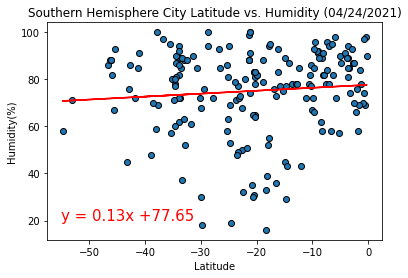

In [30]:
(slp4, int4, rval4, pval4, stderr4) = linregress(southernHemisphere["Lat"], southernHemisphere["Humidity"])
fit4 = southernHemisphere["Lat"] * slp4 + int4
line_eq4 = "y = " + str(round(slp4,2)) + "x +" + str(round(int4,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Humidity"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit4,"r-")
plt.annotate(line_eq4,(-55, 20),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

print(f"The r-squared value is {rval4}")
plt.savefig("Figures/SouthernHemisphereVSHumidity.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.1331605310622915


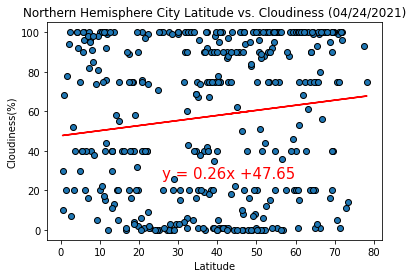

In [31]:
(slp5, int5, rval5, pval5, stderr5) = linregress(northernHemisphere["Lat"], northernHemisphere["Cloudiness"])
fit5 = northernHemisphere["Lat"] * slp5 + int5
line_eq5 = "y = " + str(round(slp5,2)) + "x +" + str(round(int5,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Cloudiness"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit5,"r-")
plt.annotate(line_eq5,(26,26),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Cloudiness (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared value is {rval5}")
plt.savefig("Figures/NorthernHemisphereVSCloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.20960474706236004


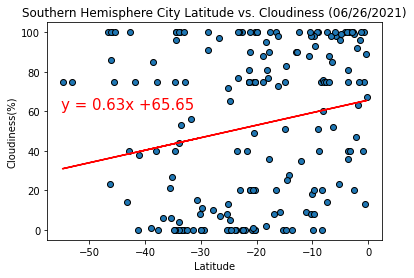

In [32]:
(slp6, int6, rval6, pval6, stderr6) = linregress(southernHemisphere["Lat"], southernHemisphere["Cloudiness"])
fit6 = southernHemisphere["Lat"] * slp6 + int6
line_eq6 = "y = " + str(round(slp6,2)) + "x +" + str(round(int6,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Cloudiness"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit6,"r-")
plt.annotate(line_eq6,(-55,61),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Cloudiness (06/26/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared value is {rval6}")
plt.savefig("Figures/SouthernHemisphereVSCloudiness.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.036448936537007225


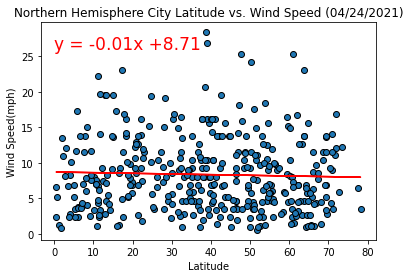

In [33]:
(slp7, int7, rval7, pval7, stderr7) = linregress(northernHemisphere["Lat"], northernHemisphere["Wind Speed"])
fit7 = northernHemisphere["Lat"] * slp7 + int7
line_eq7 = "y = " + str(round(slp7,2)) + "x +" + str(round(int7,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Wind Speed"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit7,"r-")
plt.annotate(line_eq7,(0,26),fontsize=17,color="red")

plt.title("Northern Hemisphere City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

print(f"The r-squared value is {rval7}")
plt.savefig("Figures/NorthernHemisphereVSWindSpeed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.10971140175304817


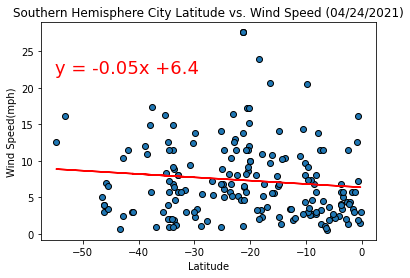

In [34]:
(slp8, int8, rval8, pval8, stderr8) = linregress(southernHemisphere["Lat"], southernHemisphere["Wind Speed"])
fit8 = southernHemisphere["Lat"] * slp8 + int8
line_eq8 = "y = " + str(round(slp8,2)) + "x +" + str(round(int8,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Wind Speed"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit8,"r-")
plt.annotate(line_eq8,(-55,22),fontsize=18,color="red")

plt.title("Southern Hemisphere City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

print(f"The r-squared value is {rval8}")
plt.savefig("Figures/SouthernHemisphereVSWindSpeed.png", bbox_inches="tight")
plt.show()